---
# **Ecuación del diodo de Shockley usando un ESP32 controlado por LabView**
---
Andrés Felipe Riaño Quintanilla     1083928808

Santiago Julio Dávila               1000413445

---
Laboratorio Avanzado I, Instituto de Física, Universidad de Antioquia

<img src="https://raw.githubusercontent.com/SantiagoJulioD/LabAv1/refs/heads/main/LabAv1-P1/p1-diagrama-1.png" alt="drawing" width="1200"/>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv1/refs/heads/main/LabAv1-P1/datap1.csv')
df

,Vd_1,Vd_2,Vd_3,Id_1,Id_2,Id_3
0,0.083516,0.084982,0.085714,109.890110,98.168498,106.227106
1,0.087179,0.091575,0.088645,87.912088,80.586081,85.714286
2,0.078388,0.072527,0.071795,97.435897,116.483516,108.424908
3,0.109890,0.129670,0.112821,59.340659,29.304029,59.340659
4,0.095238,0.101099,0.087912,81.318681,79.853480,104.029304
5,0.082784,0.081319,0.090110,91.575092,92.307692,92.307692
6,0.093773,0.087912,0.094505,78.388278,84.981685,68.864469
7,0.089377,0.096703,0.079853,87.179487,81.318681,88.644689
8,0.082051,0.073993,0.084249,105.494505,117.948718,95.970696
9,0.086447,0.085714,0.078388,79.853480,95.238095,99.633700


In [4]:
def func(x,a,b):
    return a*(np.exp(b*x)-1)

In [5]:
params,_ = curve_fit(func,df['Vd_1'],df['Id_1'])

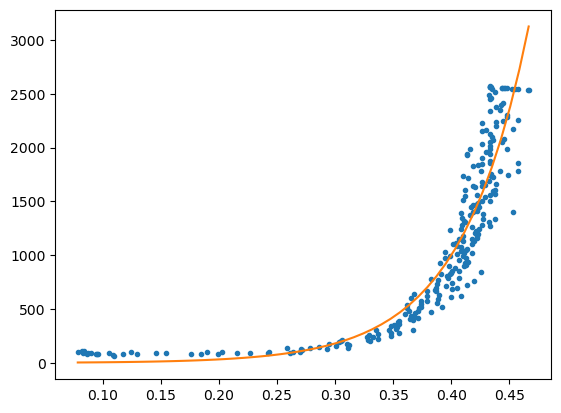

In [6]:
plt.plot(df['Vd_1'],df['Id_1'],'.')
xs = np.linspace(df['Vd_1'].min(),df['Vd_1'].max())
plt.plot(xs,func(xs,*params))

In [7]:
params

array([ 1.07481827, 17.0897956 ])